### Miscellaneous

In [1]:
def get_biggest_number(*args):
    return max(args)

In [2]:
get_biggest_number(2, 4, 1, 8)

8

#### Read data from web url

In [56]:
import urllib
url = "https://data.mendeley.com/datasets/rfhhh54g9m/2/files/c3ef4285-ed19-447a-b7bf-effd94a62fbb/sample_spectrum.txt"
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url = url, headers = headers)
data = urllib.request.urlopen(req).read().decode()

In [72]:
def load_data(data) :
    import numpy as np 
    contents = data.splitlines()
    energy_length = contents[7] 
    start_string = contents[7].find("=") + 1 
    end_string = len(contents[7])
    energy_length = int(contents[7][start_string : end_string]) 

    angle_length = contents[10] 
    start_string = contents[10].find("=") + 1 
    end_string = len(contents[10])
    angle_length = int(contents[10][start_string : end_string]) 

    intensity = np.ndarray((energy_length, angle_length)) 

    for ii in range(energy_length):
        intensity_temp = contents[57 + ii]
        end_string = len(intensity_temp)
        intensity_temp = intensity_temp[1 : end_string] 

        start_string = 0
        for jj in range(angle_length + 1): 
            end_string = intensity_temp.find("  ", start_string)
            if jj == 0 : 
                energy[ii] = float(intensity_temp[start_string : end_string]) 
                start_string = end_string + 1
            elif jj > 0 :
                intensity[ii][jj - 1] = float(intensity_temp[start_string : \
                         end_string]) 
                start_string = end_string + 1
                
    return intensity 

In [76]:
spectra = load_data(data);

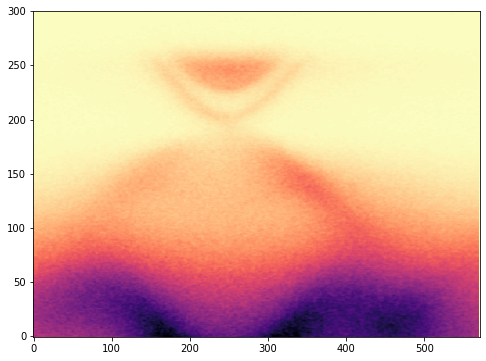

In [78]:
import matplotlib.pyplot as plt 
%matplotlib inline
fig = plt.figure(figsize = (8, 6))
plt.imshow(spectra, aspect = 'auto')
plt.gca().invert_yaxis()
plt.set_cmap('magma_r') 